###　Law of Large Number

In [3]:
import random, pylab
%matplotlib inline
#set line width
pylab.rcParams['lines.linewidth'] = 6
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 5

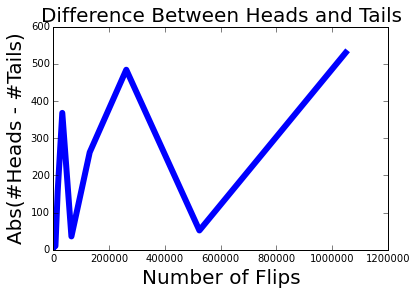

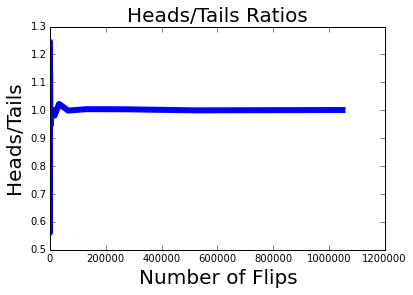

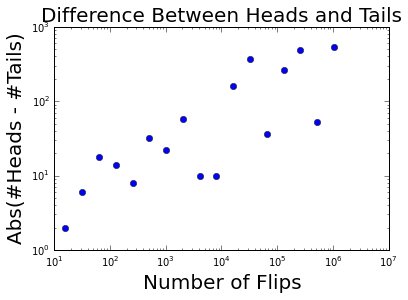

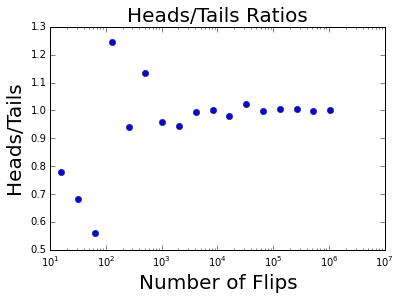

In [9]:
def flipPlot(minExp, maxExp):
    """Assumes minExp and maxExp positive integers; minExp < maxExp
       Plots results of 2**minExp to 2**maxExp coin flips"""
    ratios = []
    diffs = []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        ratios.append(numHeads/float(numTails))
        diffs.append(abs(numHeads - numTails))
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs)
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios)
    #Additional code to produce different plots from the
    #same data
    pylab.figure()
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'bo')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Heads/Tails')
    pylab.plot(xAxis, ratios, 'bo')
    pylab.semilogx()
    
random.seed(0)
flipPlot(4, 20)
pylab.show()

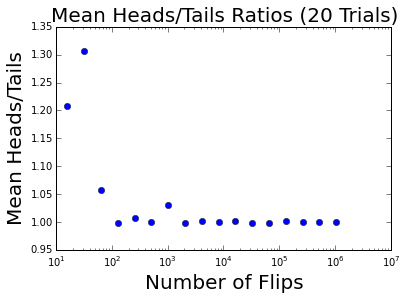

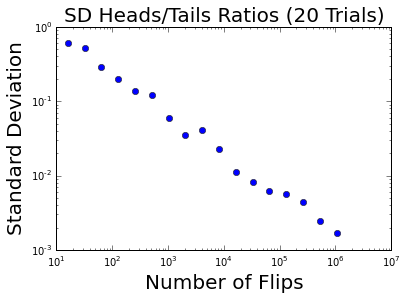

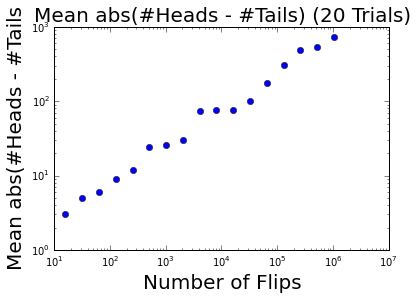

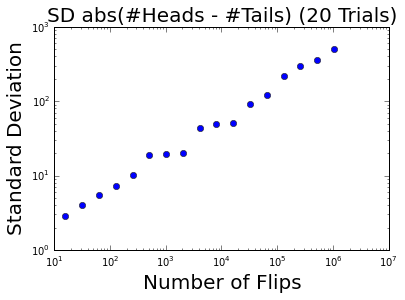

In [13]:
def stdDev(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5


def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    return numHeads, numTails

def flipPlot2(minExp, maxExp, numTrials):
    meanRatios = []
    meanDiffs = []
    ratiosSDs =  []
    diffsSDs =  []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        meanRatios.append(sum(ratios)/numTrials)
        meanDiffs.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    pylab.plot(xAxis, meanRatios, 'bo')
    pylab.title('Mean Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean Heads/Tails')
    pylab.semilogx()
    pylab.figure()
    pylab.plot(xAxis, ratiosSDs, 'bo')
    pylab.title('SD Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()
    #Additional code to look at difference in abolute
    #number of heads and tails
    pylab.figure()
    pylab.title('Mean abs(#Heads - #Tails) ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean abs(#Heads - #Tails')
    pylab.plot(xAxis, meanDiffs, 'bo')
    pylab.semilogx()
    pylab.semilogy()
    pylab.figure()
    pylab.plot(xAxis, diffsSDs, 'bo')
    pylab.title('SD abs(#Heads - #Tails) ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()

flipPlot2(4, 20, 20)
pylab.show()

### Standard Deviations and Histograms

x-range = 0.0 - 1.0
y-range = 0.0 - 1.0


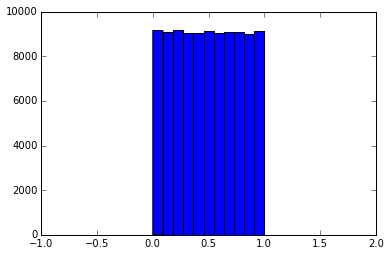

In [34]:
vals = []
for i in range(100000):
    num = random.random()
    vals.append(num)
xmin, xmax = pylab.xlim()
ymin, ymax = pylab.ylim()
print 'x-range =', xmin, '-', xmax
print 'y-range =', ymin, '-', ymax
pylab.figure
pylab.hist(vals, bins = 11)
pylab.xlim(-1.0, 2.0)
pylab.show()

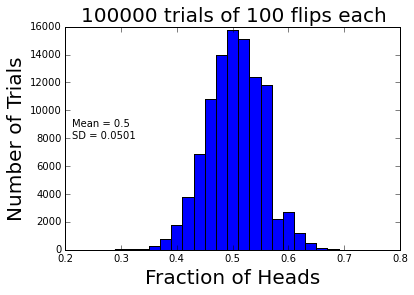

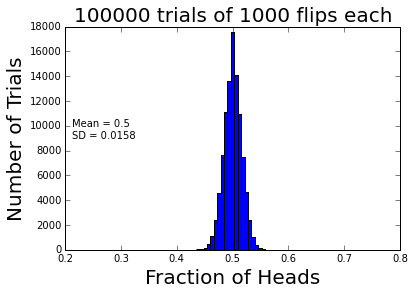

In [36]:
def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1.0
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of '
                + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(xmin + (xmax-xmin)*0.02, (ymax-ymin)/2,
               'Mean = ' + str(round(mean, 4))
               + '\nSD = ' + str(round(sd, 4)))

def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 21)
    xmin,xmax = pylab.xlim()
    ymin,ymax = pylab.ylim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 21)
    pylab.xlim(xmin, xmax)
    ymin, ymax = pylab.ylim()
    labelPlot(numFlips2, numTrials, mean2, sd2)

pylab.seed(0)    
makePlots(100,1000,100000)
pylab.show()

### L4 Problem 3

In [23]:
def stdDevOfLengths1(L):
    """
    L: a list of strings

    returns: float, the standard deviation of the lengths of the strings,
      or NaN if L is empty.
    """
    if len(L) == 0:
        return float('nan')
    import numpy as np
    lenList = np.array([len(s) for s in L])
    return lenList.std()

stdDevOfLengths1(['apples', 'oranges', 'kiwis', 'pineapples'])

1.8708286933869707

In [25]:
def stdDevOfLengths2(L):
    """
    L: a list of strings

    returns: float, the standard deviation of the lengths of the strings,
      or NaN if L is empty.
    """
    if len(L) == 0:
        return float('nan')
    lenList = [len(s) for s in L]
    meanLen = sum(lenList) / float(len(L))
    meanMinusMeanList = [(l - meanLen)**2 for l in lenList]
    return (sum(meanMinusMeanList) / float(len(L)))**0.5

stdDevOfLengths2(['apples', 'oranges', 'kiwis', 'pineapples'])

1.8708286933869707

### L4 Problem 5

Loading word list from file...
   83667 words loaded.
0.0425018227019


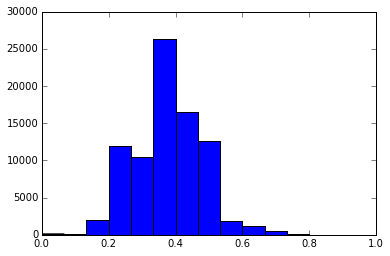

In [44]:
import pylab

# You may have to change this path
WORDLIST_FILENAME = "./words.txt"

def loadWords():
    """
    Returns a list of valid words. Words are strings of uppercase letters.
    
    Depending on the size of the word list, this function may
    take a while to finish.
    """
    print "Loading word list from file..."
    # inFile: file
    inFile = open(WORDLIST_FILENAME, 'r', 0)
    # wordList: list of strings
    wordList = []
    for line in inFile:
        wordList.append(line.strip().lower())
    print "  ", len(wordList), "words loaded."
    return wordList

def plotVowelProportionHistogram(wordList, numBins=15):
    """
    Plots a histogram of the proportion of vowels in each word in wordList
    using the specified number of bins in numBins
    """
    vowelProportion = []
    for word in wordList:
        vowelNum = 0
        for c in word:
            if c in 'aeiou':
                vowelNum += 1
        vowelProportion.append(vowelNum / float(len(word)))
    pylab.hist(vowelProportion, numBins)
    print sum([1 if k > 0.5 else 0 for k in vowelProportion]) / float(len(vowelProportion))
    

if __name__ == '__main__':
    wordList = loadWords()
    plotVowelProportionHistogram(wordList)